In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

['(0, 302)', '(2, 135)', '(0, 75)', '(0, 485)', '(0, 665)', '(1, 273)', '(0, 518)', '(2, 48)', '(0, 406)', '(0, 463)', '(3, 1)', '(0, 607)', '(1, 130)', '(2, 164)', '(0, 554)', '(2, 138)', '(2, 16)', '(2, 294)', '(2, 324)', '(2, 316)', '(0, 677)', '(1, 631)', '(1, 285)', '(0, 182)', '(1, 26)', '(0, 430)', '(1, 758)', '(0, 540)', '(0, 277)', '(2, 345)', '(0, 923)', '(1, 535)', '(1, 765)', '(3, 6)', '(0, 457)', '(1, 37)', '(0, 596)', '(0, 160)', '(2, 144)', '(2, 258)', '(0, 477)', '(0, 628)', '(1, 269)', '(1, 736)', '(1, 712)', '(0, 158)', '(2, 120)', '(2, 356)', '(0, 711)', '(1, 449)', '(2, 184)', '(1, 126)', '(0, 276)', '(0, 371)', '(1, 280)', '(2, 268)', '(1, 391)', '(1, 236)', '(1, 342)', '(2, 7)', '(1, 471)', '(2, 380)', '(0, 552)', '(0, 655)', '(0, 625)', '(2, 9)', '(0, 145)', '(1, 484)', '(1, 644)', '(2, 30)', '(0, 458)', '(0, 125)', '(0, 634)', '(0, 520)', '(0, 636)', '(2, 247)', '(0, 465)', '(2, 273)', '(2, 167)', '(2, 13)', '(2, 291)', '(0, 501)', '(0, 378)', '(2, 335)', '(1, 4

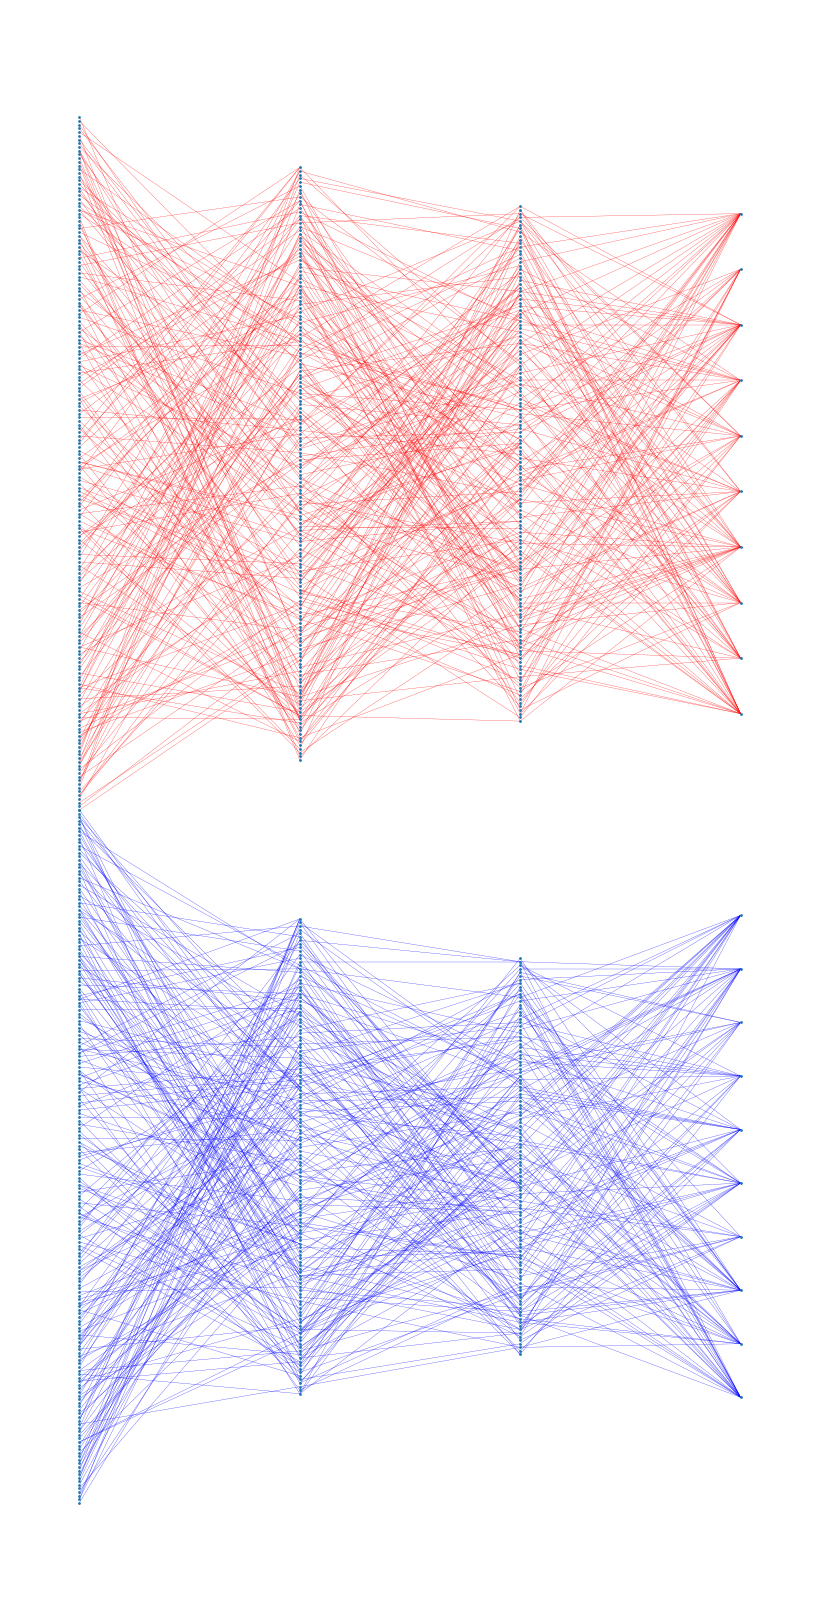

In [2]:
node_size = 1  # Adjust the size of nodes
edge_width = .18  # Adjust the width of edges
edge_color = 'blue'  # Specify the color of edges

plt.figure(figsize=(8,16))
G = G = nx.read_graphml(f'file18.graphml')
G1, G2 = [G.subgraph(c) for c in nx.connected_components(G.to_undirected())]

print(G1.nodes())


pos = nx.multipartite_layout(G1, 'layer', scale=1)
keys = pos.keys()
for key in keys:
    layer, idx = key.replace(' ', '').replace(')', '').replace('(', '').split(',')
    pos[key] = pos[key] * np.array([0,1]) + np.array([int(layer), 0])

    if int(layer) == 3:
        pos[key] = pos[key] * np.array([1,15])

nx.draw(G1, 
        pos=pos, 
        node_size=node_size, 
        width=edge_width, 
        edge_color=edge_color,
        arrows=False
)

pos = nx.multipartite_layout(G2, 'layer', scale=1)
keys = pos.keys()
for key in keys:
    layer, idx = key.replace(' ', '').replace(')', '').replace('(', '').split(',')

    pos[key] = pos[key] * np.array([0,1]) + np.array([int(layer), 0])
    if int(layer) == 3:
        pos[key] = pos[key] * np.array([1,15])
    pos[key] = pos[key] + np.array([0, 2])

nx.draw(G2, 
        pos=pos, 
        node_size=node_size, 
        width=edge_width, 
        edge_color='red',
        arrows=False
)
plt.savefig('seperated_nets.png', bbox_inches='tight')

In [3]:
inputs = [node.replace(' ', '').replace(')', '').replace('(', '').split(',') for node, data in G.nodes(data=True) if data['layer'] == 0]
inputs = [(int(a), int(b)) for a,b in inputs]

/var/folders/9n/yxn6g0xn02q48jb1vzdss0hm0000gn/T/ipykernel_36192/1390196697.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("coolwarm").copy()
/var/folders/9n/yxn6g0xn02q48jb1vzdss0hm0000gn/T/ipykernel_36192/1390196697.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Wistia").copy()
/var/folders/9n/yxn6g0xn02q48jb1vzdss0hm0000gn/T/ipykernel_36192/1390196697.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gist_rainbow

20549
9315
4187
1231


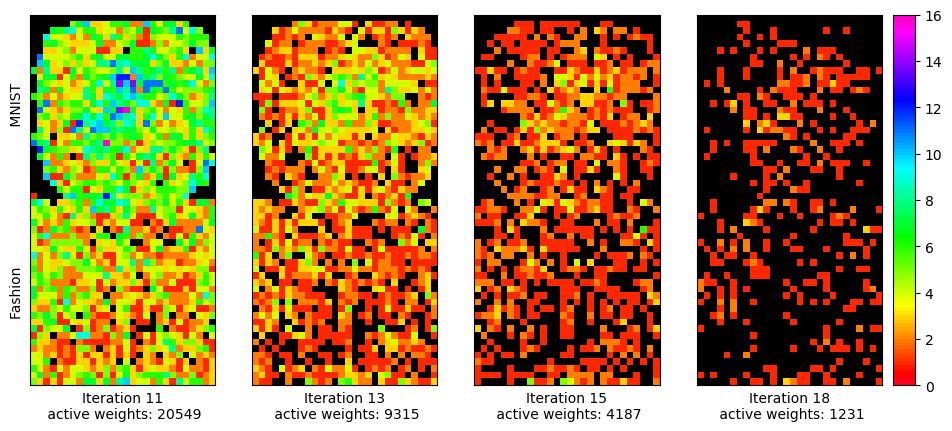

In [55]:
mx = None
from matplotlib.cm import get_cmap

cmap = get_cmap("coolwarm").copy()
cmap = get_cmap("Wistia").copy()
cmap = get_cmap("gist_rainbow").copy()
cmap.set_under(color='black')    

fig, axs = plt.subplots(1, 4, figsize=(11,6))
for ax, iteration in zip(axs, [11, 13, 15, 18]):
    G = nx.read_graphml(f'file{iteration}.graphml')
    print(len(G.edges()))
    inputs = [node for node, data in G.nodes(data=True) if data['layer'] == 0]
    x = np.zeros((1568))
    for node in inputs:
        i = int(node.replace(' ', '').replace(')', '').replace('(', '').split(',')[1])
        x[i] += G.out_degree(node)

    if mx is None:
        mx = x.max()

    img = ax.imshow(x.reshape(56, 28), cmap=cmap, vmin=0.000000001, vmax=mx)
    ax.set_xlabel(f'Iteration {iteration}\n active weights: {len(G.edges())}')
    ax.set_xticks([])
    ax.set_yticks([])
cax = fig.add_axes(
    [
        axs[-1].get_position().x1+0.01,
        axs[-1].get_position().y0,
        0.02,
        axs[-1].get_position().y1-axs[-1].get_position().y0
    ])

axs[0].set_ylabel(f'Fashion {" "*30} MNIST')
plt.colorbar(img, cax=cax)
#plt.colorbar(img)
plt.savefig(f'input-connections-iteration-{iteration}.png')